In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.feature_selection import SelectFromModel
from sklearn import preprocessing
from sklearn.externals import joblib
from sklearn.svm import SVC
import nltk
import pickle
import  dill as pickle
cols_names =  [ 'HADM_ID', 'CHARTTIME', 'CATEGORY', 'DESCRIPTION', 'ICU Admit Time', 'TEXT', 'Note2', 'Note3', 'Note Difference', 'Group_Text', 'PreICU LOS', 'Hosp_Death', 'ICU_Mortality', 'AGE', 'Gender M=1F=0', 'MAP', 'Systolic', 'Avg Diastolic', 'Avg HR', 'AVG RR', 'Avg T', 'Min T', 'Avg Alb', 'Avg AG', 'Avg Cr', 'Avg WBC', 'Min WBC', 'PT avg', 'Avg Hgb', 'Plt', 'Na', 'Avg Gluc', 'Avg K', 'GCS'
]
%matplotlib inline

C:\Users\mvf11\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
data = pd.read_excel(r"C:\Users\mvf11\Desktop\Research\NLP\NoteMort.xlsx", "Sheet1", header=None, names=cols_names)
data [0:10]

,HADM_ID,CHARTTIME,CATEGORY,DESCRIPTION,ICU Admit Time,TEXT,Note2,Note3,Note Difference,Group_Text,...,Avg Cr,Avg WBC,Min WBC,PT avg,Avg Hgb,Plt,Na,Avg Gluc,Avg K,GCS
0,165715,2181-11-22 06:07:00,Physician,Note,2181-11-23 17:47:33,SICU\n HPI:\n 53 yo M with in [**9-16**] h...,SICU\n HPI:\n 53 yo M with in [**9-16**] h...,NaN,-1.486493,SICU\n HPI:\n 53 yo M with in [**9-16**] h...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.00,14.000000
1,103098,2176-11-20 06:18:00,Physician,Intensivist Note,2176-11-21 16:31:59,CVICU\n HPI:\n HD2\n [**11-20**] POD 1\n...,CVICU\n HPI:\n HD2\n [**11-20**] POD 1\n...,NaN,-1.426377,CVICU\n HPI:\n HD2\n [**11-20**] POD 1\n...,...,0.70,5.70,5.7,16.50,NaN,182.0,138.0,133.0,4.70,10.000000
2,175432,2108-01-23 04:46:00,Physician,Intensivist Note,2160-07-09 18:12:58,TITLE:\n Chief Complaint:\n 24 Hour Events...,"TITLE:\n Chief Complaint: Rigors, shortness...",TITLE:\n Chief Complaint:\n 24 Hour Events...,0.476412,TITLE:\n Chief Complaint:\n 24 Hour Events...,...,0.90,3.00,3.0,15.20,10.6,102.0,139.0,83.0,3.70,13.333333
3,181315,2117-11-18 18:03:00,Physician,Intensivist Note,2168-11-04 16:33:48,Chief Complaint: OSH transfer from [**Hospita...,"Chief Complaint: MRSA sepsis, access issues.\n...",Chief Complaint: OSH transfer from [**Hospita...,0.127222,Chief Complaint: OSH transfer from [**Hospita...,...,8.45,11.40,10.5,18.70,8.0,68.5,133.5,91.0,3.75,15.000000
4,187311,2125-11-20 08:24:00,Physician,Physician Attending Admission Note - MICU,2124-09-13 23:18:28,Chief Complaint: Intracranial hemorrhage\n H...,Chief Complaint: Intracranial hemorrhage\n H...,NaN,0.142037,Chief Complaint: Intracranial hemorrhage\n H...,...,1.00,27.50,27.5,14.80,13.9,123.0,114.0,121.0,3.80,7.666667
5,152311,2100-12-29 03:32:00,Physician,Intensivist Note,2145-05-22 00:07:53,SICU\n HPI:\n 48 y/o f s/p R free tram [**...,SICU\n HPI:\n 48 y/o f s/p R free tram [**...,NaN,0.139664,SICU\n HPI:\n 48 y/o f s/p R free tram [**...,...,0.70,14.30,13.3,15.10,8.7,224.5,140.0,136.0,3.60,14.333333
6,137296,2132-06-06 05:27:00,Physician,Physician Resident Admission Note,2188-12-18 10:36:04,CVICU\n HPI:\n HD3\n [**12-19**] POD [**...,NaN,NaN,0.927731,CVICU\n HPI:\n HD3\n [**12-19**] POD [**...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000
7,145965,2133-02-18 22:01:00,Physician,Intensivist Note,2109-02-24 04:16:11,TITLE: Cardiology Fellow Admission Note Addend...,TITLE:\n Cardiology Teaching Physician Note\...,"Chief Complaint: Chest Pain, STEMI\n HPI:\n...",0.013067,TITLE: Cardiology Fellow Admission Note Addend...,...,1.00,10.60,10.1,NaN,15.2,285.5,137.0,87.0,4.30,15.000000
8,166086,2186-03-23 04:21:00,Physician,Cardiology Fellow Admission Note/ Addendum,2192-10-17 19:41:52,SICU\n HPI:\n 54 year old female presents ...,SICU\n HPI:\n 54 year old female presents ...,Chief Complaint: left cerebellar mass\n HPI:...,0.511204,SICU\n HPI:\n 54 year old female presents ...,...,0.70,6.45,5.1,12.90,12.4,259.5,139.0,142.0,4.20,10.000000
9,132994,2126-12-02 11:33:00,Physician,Intensivist Note,2144-12-24 16:16:41,Chief Complaint: Altered mental status\n HP...,Chief Complaint:\n 24 Hour Events:\n INVASIV...,Chief Complaint:\n 24 Hour Events:\n INVASIV...,0.334248,Chief Complaint: Altered mental status\n HP...,...,0.40,6.60,6.5,15.55,11.1,205.5,141.0,91.0,3.55,14.333333


In [3]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [4]:
#le = LabelEncoder()

In [5]:
#le.fit(data['CV'])
#data['CV'] = le.transform(data['CV'])

In [6]:
#data['CV'].unique()

In [7]:
data['Group_Text'] = data['Group_Text'].replace('\d+', 'NUM', regex=True)
data['Group_Text'] [0:10]

0    SICU\n   HPI:\n   NUM yo M with in [**NUM-NUM*...
1    CVICU\n   HPI:\n   HDNUM\n   [**NUM-NUM**] POD...
2    TITLE:\n   Chief Complaint:\n   NUM Hour Event...
3    Chief Complaint:  OSH transfer from [**Hospita...
4    Chief Complaint: Intracranial hemorrhage\n   H...
5    SICU\n   HPI:\n   NUM y/o f s/p R free tram [*...
6    CVICU\n   HPI:\n   HDNUM\n   [**NUM-NUM**] POD...
7    TITLE: Cardiology Fellow Admission Note Addend...
8    SICU\n   HPI:\n   NUM year old female presents...
9    Chief Complaint:  Altered mental status\n   HP...
Name: Group_Text, dtype: object

In [8]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [9]:
stopword = nltk.corpus.stopwords.words('english')
digit = ['aa', 'aao','aaoxnum','ab','chief','num','patient','nummg','__','_num', 'ml','mg', 'dl','icu', 'pm', 'history','medications','po','comments','hospitalnum','sponum', 'left', 'pain', 'total', 'right', 'last', 'meq', 'labs','respiratory', 'pulse', 'name', 'present', 'plan','code', 'balance', 'rhythm', 'pt', 'assessed', 'blood', 'fluid', 'hr', 'min', 'rr', 'assessment', 'chest', 'iv', 'normal', 'bp', 'status', 'urine', 'daily','given', 'edema', 'hct', 
'acute', 'allergies', 'care', 'extremities', 'ng', 'abdominal', 'snum', 'prn', 'heart', 'control', 'signs', 'likely','onum']
digits = ['num', 'dl','_num', 'javascript', 'ml', 'mg', 'meq','plan']
stopword.extend(digit)

In [10]:
from string import digits 
import pickle
import  dill as pickle


In [11]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(input='content',
    encoding='utf-8',
    decode_error='strict',
    strip_accents=None,
    lowercase=True,
    preprocessor=None,
    tokenizer=None,
    stop_words=stopword,
    token_pattern='(?u)\\b\\w\\w+\\b',
    ngram_range=(1, 1),
    analyzer='word',
    max_df=1.0,
    min_df=1,
    max_features=4000,
    vocabulary=None,
    binary=False)
data_cv = cv.fit_transform(data['Group_Text'])
data_cv = preprocessing.normalize(data_cv)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
#data_dtm1 = pd.merge(data['Row_ID'], data_dtm, right_index=True, left_index=True)
data_dtm [0:10]


,aaa,abd,abdomen,abdominial,abg,abgs,ability,ablation,able,abnormal,...,yom,young,yr,yrs,zocor,zofran,zoloft,zolpidem,zosyn,zyprexa
0,0.000000,0.000000,0.045620,0.000000,0.045620,0.0,0.0,0.0,0.022810,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.04562,0.000000,0.0,0.0,0.0
1,0.000000,0.000000,0.046804,0.000000,0.046804,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0
2,0.000000,0.010686,0.000000,0.000000,0.021372,0.0,0.0,0.0,0.010686,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0
3,0.000000,0.017823,0.000000,0.000000,0.017823,0.0,0.0,0.0,0.000000,0.035646,...,0.035646,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0
4,0.000000,0.000000,0.000000,0.000000,0.054800,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0
5,0.000000,0.049875,0.099751,0.000000,0.049875,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.049875,0.0,0.0,0.0
6,0.044677,0.000000,0.044677,0.000000,0.044677,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.089353,0.00000,0.000000,0.0,0.0,0.0
7,0.000000,0.023676,0.023676,0.023676,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0
8,0.000000,0.039246,0.039246,0.000000,0.058869,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.019623,0.000000,0.00000,0.000000,0.0,0.0,0.0
9,0.000000,0.019451,0.000000,0.000000,0.019451,0.0,0.0,0.0,0.019451,0.019451,...,0.000000,0.0,0.019451,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0


In [12]:
sum_words = data_cv.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
words_freq[0:40]

[('prophylaxis', 415.4657945244583),
 ('dose', 411.2810231708877),
 ('drains', 404.77266309775996),
 ('nutrition', 400.7499571368743),
 ('ul', 396.0472101500314),
 ('since', 395.7715053789978),
 ('mmhg', 395.28116622564676),
 ('lines', 392.6354551036226),
 ('hours', 376.6603629932711),
 ('neurologic', 375.5278823966956),
 ('cardiovascular', 372.20903516472544),
 ('sounds', 369.9462906904501),
 ('non', 369.58852847809584),
 ('tube', 367.48296650322413),
 ('gauge', 366.41241365254325),
 ('ct', 362.9340065241577),
 ('dvt', 356.7910811211854),
 ('continue', 354.6712684388354),
 ('antibiotics', 353.8393216541037),
 ('time', 351.68921600346215),
 ('monitoring', 349.35504931508154),
 ('stool', 347.93436091404305),
 ('full', 344.390035058067),
 ('medical', 341.61204941890713),
 ('ivf', 338.29616839320664),
 ('disposition', 335.5247323798997),
 ('ulcer', 332.8396372288335),
 ('family', 332.78922788655865),
 ('stress', 327.66880917508814),
 ('cmhnumo', 325.8127599875125),
 ('renal', 325.50065118

In [13]:
Z = ['PreICU LOS', 'AGE', 'Systolic', 'Avg Diastolic', 'Avg HR', 'AVG RR', 'Avg T', 'Avg WBC', 'Min WBC','Avg Alb', 'Avg AG', 'Avg Cr',  'PT avg', 'Avg Hgb', 'Plt', 'Na', 'Avg K','Avg Gluc', 'GCS']
Z [0:10]

['PreICU LOS',
 'AGE',
 'Systolic',
 'Avg Diastolic',
 'Avg HR',
 'AVG RR',
 'Avg T',
 'Avg WBC',
 'Min WBC',
 'Avg Alb']

In [14]:
X = pd.merge(data_dtm, data[Z], right_index=True, left_index=True)
y = data.Hosp_Death
X [0:10]

,aaa,abd,abdomen,abdominial,abg,abgs,ability,ablation,able,abnormal,...,Avg Alb,Avg AG,Avg Cr,PT avg,Avg Hgb,Plt,Na,Avg K,Avg Gluc,GCS
0,0.000000,0.000000,0.045620,0.000000,0.045620,0.0,0.0,0.0,0.022810,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.00,NaN,14.000000
1,0.000000,0.000000,0.046804,0.000000,0.046804,0.0,0.0,0.0,0.000000,0.000000,...,NaN,9.0,0.70,16.50,NaN,182.0,138.0,4.70,133.0,10.000000
2,0.000000,0.010686,0.000000,0.000000,0.021372,0.0,0.0,0.0,0.010686,0.000000,...,2.6,11.0,0.90,15.20,10.6,102.0,139.0,3.70,83.0,13.333333
3,0.000000,0.017823,0.000000,0.000000,0.017823,0.0,0.0,0.0,0.000000,0.035646,...,2.6,20.0,8.45,18.70,8.0,68.5,133.5,3.75,91.0,15.000000
4,0.000000,0.000000,0.000000,0.000000,0.054800,0.0,0.0,0.0,0.000000,0.000000,...,NaN,16.0,1.00,14.80,13.9,123.0,114.0,3.80,121.0,7.666667
5,0.000000,0.049875,0.099751,0.000000,0.049875,0.0,0.0,0.0,0.000000,0.000000,...,NaN,11.0,0.70,15.10,8.7,224.5,140.0,3.60,136.0,14.333333
6,0.044677,0.000000,0.044677,0.000000,0.044677,0.0,0.0,0.0,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000
7,0.000000,0.023676,0.023676,0.023676,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,NaN,13.0,1.00,NaN,15.2,285.5,137.0,4.30,87.0,15.000000
8,0.000000,0.039246,0.039246,0.000000,0.058869,0.0,0.0,0.0,0.000000,0.000000,...,NaN,13.0,0.70,12.90,12.4,259.5,139.0,4.20,142.0,10.000000
9,0.000000,0.019451,0.000000,0.000000,0.019451,0.0,0.0,0.0,0.019451,0.019451,...,3.6,11.5,0.40,15.55,11.1,205.5,141.0,3.55,91.0,14.333333


In [19]:
X1 = X.fillna(X.mean())
X1 [0:10]

,aaa,abd,abdomen,abdominial,abg,abgs,ability,ablation,able,abnormal,...,Avg Alb,Avg AG,Avg Cr,PT avg,Avg Hgb,Plt,Na,Avg K,Avg Gluc,GCS
0,0.000000,0.000000,0.045620,0.000000,0.045620,0.0,0.0,0.0,0.022810,0.000000,...,3.097854,13.505295,1.466264,16.448152,10.84201,228.134832,139.003882,4.000000,134.659406,14.000000
1,0.000000,0.000000,0.046804,0.000000,0.046804,0.0,0.0,0.0,0.000000,0.000000,...,3.097854,9.000000,0.700000,16.500000,10.84201,182.000000,138.000000,4.700000,133.000000,10.000000
2,0.000000,0.010686,0.000000,0.000000,0.021372,0.0,0.0,0.0,0.010686,0.000000,...,2.600000,11.000000,0.900000,15.200000,10.60000,102.000000,139.000000,3.700000,83.000000,13.333333
3,0.000000,0.017823,0.000000,0.000000,0.017823,0.0,0.0,0.0,0.000000,0.035646,...,2.600000,20.000000,8.450000,18.700000,8.00000,68.500000,133.500000,3.750000,91.000000,15.000000
4,0.000000,0.000000,0.000000,0.000000,0.054800,0.0,0.0,0.0,0.000000,0.000000,...,3.097854,16.000000,1.000000,14.800000,13.90000,123.000000,114.000000,3.800000,121.000000,7.666667
5,0.000000,0.049875,0.099751,0.000000,0.049875,0.0,0.0,0.0,0.000000,0.000000,...,3.097854,11.000000,0.700000,15.100000,8.70000,224.500000,140.000000,3.600000,136.000000,14.333333
6,0.044677,0.000000,0.044677,0.000000,0.044677,0.0,0.0,0.0,0.000000,0.000000,...,3.097854,13.505295,1.466264,16.448152,10.84201,228.134832,139.003882,4.149453,134.659406,7.000000
7,0.000000,0.023676,0.023676,0.023676,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,3.097854,13.000000,1.000000,16.448152,15.20000,285.500000,137.000000,4.300000,87.000000,15.000000
8,0.000000,0.039246,0.039246,0.000000,0.058869,0.0,0.0,0.0,0.000000,0.000000,...,3.097854,13.000000,0.700000,12.900000,12.40000,259.500000,139.000000,4.200000,142.000000,10.000000
9,0.000000,0.019451,0.000000,0.000000,0.019451,0.0,0.0,0.0,0.019451,0.019451,...,3.600000,11.500000,0.400000,15.550000,11.10000,205.500000,141.000000,3.550000,91.000000,14.333333


In [20]:
X = preprocessing.normalize(X1)
X = X1
X [0:10]

,aaa,abd,abdomen,abdominial,abg,abgs,ability,ablation,able,abnormal,...,Avg Alb,Avg AG,Avg Cr,PT avg,Avg Hgb,Plt,Na,Avg K,Avg Gluc,GCS
0,0.000000,0.000000,0.045620,0.000000,0.045620,0.0,0.0,0.0,0.022810,0.000000,...,3.097854,13.505295,1.466264,16.448152,10.84201,228.134832,139.003882,4.000000,134.659406,14.000000
1,0.000000,0.000000,0.046804,0.000000,0.046804,0.0,0.0,0.0,0.000000,0.000000,...,3.097854,9.000000,0.700000,16.500000,10.84201,182.000000,138.000000,4.700000,133.000000,10.000000
2,0.000000,0.010686,0.000000,0.000000,0.021372,0.0,0.0,0.0,0.010686,0.000000,...,2.600000,11.000000,0.900000,15.200000,10.60000,102.000000,139.000000,3.700000,83.000000,13.333333
3,0.000000,0.017823,0.000000,0.000000,0.017823,0.0,0.0,0.0,0.000000,0.035646,...,2.600000,20.000000,8.450000,18.700000,8.00000,68.500000,133.500000,3.750000,91.000000,15.000000
4,0.000000,0.000000,0.000000,0.000000,0.054800,0.0,0.0,0.0,0.000000,0.000000,...,3.097854,16.000000,1.000000,14.800000,13.90000,123.000000,114.000000,3.800000,121.000000,7.666667
5,0.000000,0.049875,0.099751,0.000000,0.049875,0.0,0.0,0.0,0.000000,0.000000,...,3.097854,11.000000,0.700000,15.100000,8.70000,224.500000,140.000000,3.600000,136.000000,14.333333
6,0.044677,0.000000,0.044677,0.000000,0.044677,0.0,0.0,0.0,0.000000,0.000000,...,3.097854,13.505295,1.466264,16.448152,10.84201,228.134832,139.003882,4.149453,134.659406,7.000000
7,0.000000,0.023676,0.023676,0.023676,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,3.097854,13.000000,1.000000,16.448152,15.20000,285.500000,137.000000,4.300000,87.000000,15.000000
8,0.000000,0.039246,0.039246,0.000000,0.058869,0.0,0.0,0.0,0.000000,0.000000,...,3.097854,13.000000,0.700000,12.900000,12.40000,259.500000,139.000000,4.200000,142.000000,10.000000
9,0.000000,0.019451,0.000000,0.000000,0.019451,0.0,0.0,0.0,0.019451,0.019451,...,3.600000,11.500000,0.400000,15.550000,11.10000,205.500000,141.000000,3.550000,91.000000,14.333333


In [21]:
# x and Y split for cross validation
#from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.30)

In [22]:
X_test [0:10]

,aaa,abd,abdomen,abdominial,abg,abgs,ability,ablation,able,abnormal,...,Avg Alb,Avg AG,Avg Cr,PT avg,Avg Hgb,Plt,Na,Avg K,Avg Gluc,GCS
4200,0.0,0.000000,0.058343,0.000000,0.058343,0.0,0.0,0.000000,0.000000,0.0,...,3.097854,14.000000,0.900000,11.400000,13.30,326.0,141.000000,4.300000,134.000000,15.000000
1914,0.0,0.000000,0.000000,0.000000,0.035618,0.0,0.0,0.000000,0.000000,0.0,...,3.097854,10.000000,0.700000,14.300000,10.10,276.0,142.000000,4.000000,157.000000,15.000000
3534,0.0,0.016593,0.049779,0.000000,0.033186,0.0,0.0,0.016593,0.033186,0.0,...,3.097854,11.000000,1.300000,16.448152,11.20,166.0,141.000000,3.300000,91.000000,15.000000
4668,0.0,0.029007,0.029007,0.000000,0.029007,0.0,0.0,0.000000,0.043510,0.0,...,3.097854,17.500000,1.150000,11.300000,13.70,315.0,137.500000,5.700000,175.000000,13.666667
7550,0.0,0.000000,0.000000,0.000000,0.078675,0.0,0.0,0.000000,0.000000,0.0,...,2.650000,12.333333,1.000000,15.200000,13.15,185.0,141.333333,5.500000,138.333333,11.000000
852,0.0,0.029961,0.029961,0.029961,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,3.097854,12.000000,1.000000,16.448152,9.20,274.0,138.000000,5.100000,134.000000,15.000000
152,0.0,0.000000,0.055027,0.000000,0.055027,0.0,0.0,0.000000,0.000000,0.0,...,3.097854,17.500000,0.700000,11.500000,13.85,293.5,140.500000,4.050000,137.500000,13.500000
7023,0.0,0.000000,0.000000,0.000000,0.055079,0.0,0.0,0.000000,0.000000,0.0,...,3.100000,12.000000,0.900000,20.050000,9.70,357.5,138.000000,3.950000,188.000000,14.666667
7466,0.0,0.010270,0.000000,0.000000,0.041080,0.0,0.0,0.000000,0.000000,0.0,...,3.097854,13.505295,1.466264,16.448152,10.20,202.0,139.003882,4.149453,134.659406,15.000000
462,0.0,0.000000,0.019604,0.000000,0.078416,0.0,0.0,0.000000,0.000000,0.0,...,2.100000,11.000000,0.300000,11.600000,8.95,196.0,139.500000,3.150000,135.500000,10.666667


In [23]:
filepath11 = r'c:\\Users\mvf11\Desktop\Research\xtest.xlsx'
filepath22 = r'c:\\Users\mvf11\Desktop\Research\xtrain.xlsx'
O = pd.merge(X_test, y_test, right_index=True, left_index=True)
OO = O.iloc [0:2267, 4000:4020]
P = pd.merge(X_train, y_train, right_index=True, left_index=True)
PP = P.iloc [0:5288, 4000:4020]

In [24]:
#OO.to_excel(filepath11)
#PP.to_excel(filepath22)

In [25]:
y_test [0:10]

4200    0
1914    0
3534    0
4668    0
7550    1
852     0
152     0
7023    1
7466    0
462     1
Name: Hosp_Death, dtype: int64

In [26]:
# Create a random forest classifier
from sklearn import metrics
model = SVC(kernel='linear',probability=True)

In [27]:
# Train the classifier
model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [28]:
#pickle.dump(model, open("NoteMortSVM.dat", "wb"), protocol = 4)

In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from xgboost import plot_importance
from sklearn.metrics import roc_auc_score 
#Class predictions
y_pred_class = model.predict(X_test)

In [30]:
#scores1 = cross_val_score(model, X, y, cv=10, scoring = make_scorer(roc_auc_score,needs_proba=True))

In [31]:
#95% CI
#print(scores1.mean(), scores1.std() * 1.96)

In [32]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from xgboost import plot_importance
from sklearn.calibration import calibration_curve
#Class predictions
y_pred_class = model.predict(X_test)

In [33]:
#creating labels for confusion matrix
from sklearn import metrics
print('true:', y_test.values[0:100])
print('pred:', y_pred_class[0:100])

true: [0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
pred: [0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [34]:
#Confusion matrix slices
confusion = metrics.confusion_matrix(y_test, y_pred_class)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
print(confusion)

[[2065   13]
 [ 149   40]]


In [35]:
#accuracy Calculation
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred_class))

0.9285399205999118
0.9285399205999118


In [36]:
#calculating null accuracy
max(y_test.mean(), 1-y_test.mean())

0.9166299073665638

In [37]:
#Senitivity
print(metrics.recall_score(y_test, y_pred_class))
TP / float(TP + FN)

0.21164021164021163


0.21164021164021163

In [38]:
#Specificity
print(TN / float(TN + FP))

0.9937439846005774


In [39]:
#Store Predicted Prob
y_pred_prob = model.predict_proba(X_test)[:,1]
y_pred_prob

array([0.00479078, 0.01044218, 0.00211087, ..., 0.00401261, 0.00360879,
       0.12828004])

In [40]:
#AUC
metrics.roc_auc_score(y_test, y_pred_prob)

0.8905260960121402

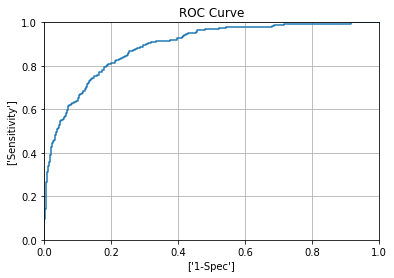

In [41]:
from sklearn.metrics import roc_curve  
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob, pos_label=1)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title("ROC Curve")
plt.xlabel(['1-Spec'])
plt.ylabel(['Sensitivity'])
plt.grid(True)
plt.savefig('SVMROCNoteMOrt.png')

In [116]:
(model_y, model_x) = calibration_curve(y_test, y_pred_prob, n_bins=10,strategy='quantile')

NameError: name 'model_x' is not defined

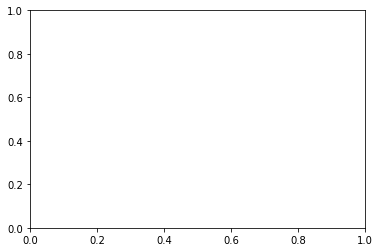

In [42]:
%matplotlib inline
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

fig, ax = plt.subplots()
# only these two lines are calibration curves
plt.plot(model_x,model_y, marker='o', linewidth=1, label='Calibration')

# reference line, legends, and axis labels
line = mlines.Line2D([0, 1], [0, 1], color='black')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
fig.suptitle('Calibration plot')
ax.set_xlabel('Predicted')
ax.set_ylabel('Observed')
plt.legend()
plt.show()
plt.savefig('SVMCalibrationNoteMOrt.png')

In [37]:
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

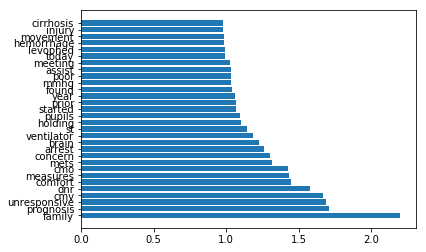

In [44]:
def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    #plt.show()
    
f_importances(abs(model.coef_[0]), X_test, top=30)
plt.savefig('SVMiportanct.png')

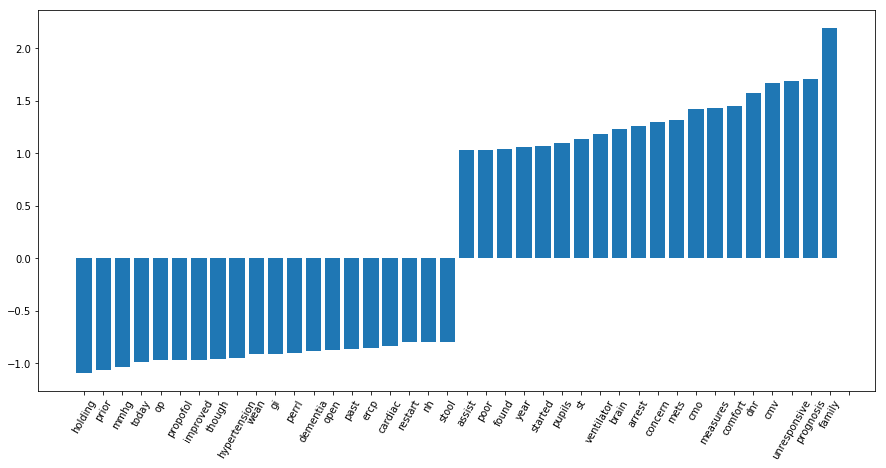

In [74]:
def plot_coefficients(classifier, feature_names, top_features=20):
 coef = classifier.coef_.ravel()
 top_positive_coefficients = np.argsort(coef)[-top_features:]
 top_negative_coefficients = np.argsort(coef)[:top_features]
 top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
 # create plot
 plt.figure(figsize=(15, 7))
 #colors = [red if c < 0 else blue for c in coef[top_coefficients]]
 plt.bar(np.arange(2 * top_features), coef[top_coefficients])
 feature_names = np.array(feature_names)
 plt.xticks(np.arange(0, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60)
 plt.show()

plot_coefficients(model, cv.get_feature_names())

In [119]:
evaluate_threshold(0.12)

Sensitivity: 0.6931216931216931
Specificity: 0.8768046198267565


In [68]:
from sklearn.model_selection import learning_curve

In [69]:
#Creating learning curves
#train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=10, scoring = make_scorer(roc_auc_score, needs_proba=True), n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 50))

In [70]:
#Means and std of test/train scores
train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)
test_mean = np.mean(test_scores, axis = 1)
test_std = np.std(test_scores, axis = 1)

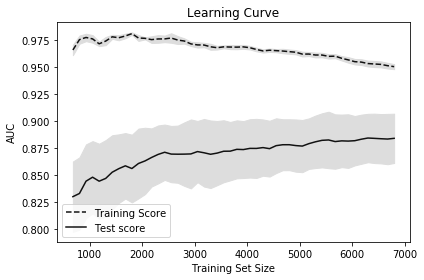

In [75]:
#PLot lines of learning curve
plt.plot(train_sizes, train_mean, '--', color="#111111", label = "Training Score")
plt.plot(train_sizes, test_mean, color = "#111111", label = "Test score")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("AUC"), plt.legend(loc="best")
plt.tight_layout()
#plt.show()
plt.savefig('LearningNoteMOrt.png')

In [120]:
#y_test = le.inverse_transform(y_test)


In [121]:
#y_pred_class = le.inverse_transform(y_pred_class)

In [122]:
#y_test [0:10] PROBLMSS BELOW

In [123]:
df1 = np.array(y_pred_prob)
df2 = np.array(y_test)
df3 = pd.DataFrame(df1, df2)
df3 [0:10]

,0
0,0.004996
0,0.010834
0,0.002213
0,0.026666
1,0.675182
0,0.003461
0,0.028829
1,0.193030
0,0.074558
1,0.651798


In [124]:
filepath = r'c:\\Users\mvf11\Desktop\Research\SVMNoteHospMortResults.xlsx'

In [125]:
df3.to_excel(filepath)